In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\harsh\AppData\Local\Temp\pip-install-1z91vcgn\tensorflow-gpu_0d1e9f4361a74f21b321cf885afd4c04\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
pip uninstall tensorflow-gpu tensorflow-intel

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Augmentor                     0.2.12
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beauti

In [1]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the root directory containing subfolders for each image class
data_dir = 'E:\Research\data'
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed

# Use the ImageDataGenerator to load and preprocess images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


Found 266729 images belonging to 2 classes.
Found 66682 images belonging to 2 classes.


In [9]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [6]:
import Augmentor
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = 'E:\Research\data\\train'  
batch_size = 32
image_size = (224, 224)  

for i in range(1, 16):
    class_path = os.path.join(data_dir, 'train' + str(i))
    
    p = Augmentor.Pipeline(class_path)
    
    p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
    p.rotate_random_90(probability=1)
    p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
    p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
    p.random_erasing(probability=0.3, rectangle_area=0.2)
    
    p.sample(1500)

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


Initialised with 5036 image(s) found.
Output directory set to E:\Research\data\train\train1\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B2673D00>: 100%|██████████| 1500/1500 [00:26<00:00, 57.36 Samples/s] 


Initialised with 5000 image(s) found.
Output directory set to E:\Research\data\train\train2\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B2671090>: 100%|██████████| 1500/1500 [00:39<00:00, 38.31 Samples/s]


Initialised with 5250 image(s) found.
Output directory set to E:\Research\data\train\train3\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1BDF580>: 100%|██████████| 1500/1500 [00:24<00:00, 62.34 Samples/s] 


Initialised with 5244 image(s) found.
Output directory set to E:\Research\data\train\train4\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B24FDA20>: 100%|██████████| 1500/1500 [00:31<00:00, 46.89 Samples/s]


Initialised with 4250 image(s) found.
Output directory set to E:\Research\data\train\train5\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B263CA60>: 100%|██████████| 1500/1500 [00:28<00:00, 52.41 Samples/s]


Initialised with 4000 image(s) found.
Output directory set to E:\Research\data\train\train6\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1AE2230>: 100%|██████████| 1500/1500 [00:23<00:00, 64.40 Samples/s] 


Initialised with 1250 image(s) found.
Output directory set to E:\Research\data\train\train7\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225AC80BAF0>: 100%|██████████| 1500/1500 [00:20<00:00, 73.84 Samples/s] 


Initialised with 4250 image(s) found.
Output directory set to E:\Research\data\train\train8\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B24C0B50>: 100%|██████████| 1500/1500 [00:19<00:00, 77.35 Samples/s] 


Initialised with 5588 image(s) found.
Output directory set to E:\Research\data\train\train9\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225AFCCA440>: 100%|██████████| 1500/1500 [00:28<00:00, 53.33 Samples/s]


Initialised with 5388 image(s) found.
Output directory set to E:\Research\data\train\train10\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1BD3070>: 100%|██████████| 1500/1500 [00:24<00:00, 61.87 Samples/s] 


Initialised with 6250 image(s) found.
Output directory set to E:\Research\data\train\train11\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1BAFD90>: 100%|██████████| 1500/1500 [00:36<00:00, 41.10 Samples/s]


Initialised with 250 image(s) found.
Output directory set to E:\Research\data\train\train12\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1AEFD30>: 100%|██████████| 1500/1500 [00:27<00:00, 54.95 Samples/s] 


Initialised with 5713 image(s) found.
Output directory set to E:\Research\data\train\train13\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1BFBCA0>: 100%|██████████| 1500/1500 [00:25<00:00, 57.97 Samples/s]   


Initialised with 4566 image(s) found.
Output directory set to E:\Research\data\train\train14\output.

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x225B25692D0>: 100%|██████████| 1500/1500 [00:28<00:00, 52.35 Samples/s]


Initialised with 3500 image(s) found.
Output directory set to E:\Research\data\train\train15\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x225B1B1E350>: 100%|██████████| 1500/1500 [00:29<00:00, 50.67 Samples/s] 


Found 289843 images belonging to 15 classes.
Found 72456 images belonging to 15 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
data_dir = 'E:\\Research\\data'
batch_size = 32
image_size = (224, 224)

# Use the ImageDataGenerator to load and preprocess the augmented BMP images.
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset.
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training',  # 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset.
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Do not shuffle the validation data
)

# Define the number of classes based on your dataset
num_classes = len(train_data.class_indices)

# Build and train a machine learning model (e.g., a neural network).
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with reduced epochs and lower verbosity.
epochs = 5  # Reduced number of training epochs
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    verbose=1)  # Lower verbosity

# Save the trained model for future use.
model.save('my_model.h5')


Found 289840 images belonging to 2 classes.
Found 72459 images belonging to 2 classes.
Epoch 1/5
6385/9058 [====================>.........] - ETA: 5:10:07 - loss: 1.1320e-04 - accuracy: 0.9999

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
data_dir = 'E:\\Research\\data'
batch_size = 32
image_size = (224, 224)
num_classes = 15  # Specify the number of classes based on your dataset

# Use the ImageDataGenerator to load and preprocess the augmented images.
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create training and validation data generators with prefetching.
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training',  # 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
    interpolation='bilinear',  # Improved interpolation for resizing
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Do not shuffle the validation data
    interpolation='bilinear',  # Improved interpolation for resizing
)

# Build a simplified CNN model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping to monitor validation loss.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Number of epochs with no improvement after which training will stop
    restore_best_weights=True
)

# Train the model with mixed precision if a GPU is available.
if tf.config.experimental.list_physical_devices('GPU'):
    policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
    tf.keras.mixed_precision.experimental.set_policy(policy)

# Increase the number of training epochs for better learning.
epochs = 20
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    verbose=1,
    callbacks=[early_stopping],  # Apply early stopping
)

# Save the trained model for future use.
model.save('my_model.h5')


In [1]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
data_dir = 'E:\\Research\\data'
batch_size = 32
image_size = (224, 224)
num_classes = len(os.listdir(data_dir))  # Assumes each subdirectory corresponds to a class

# Use the ImageDataGenerator to load and preprocess the augmented BMP images.
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset.
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training',  # 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset.
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Do not shuffle the validation data
)

# Build a simple convolutional neural network (CNN) model.
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model.
epochs = 10  
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    verbose=2)


In [2]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
print(class_path)

NameError: name 'class_path' is not defined

In [15]:
import Augmentor
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = 'E:\\Research\\data'
batch_size = 32
image_size = (224, 224)

# Use Augmentor to generate augmented images for each class.
for i in range(1, 16):
    class_path = os.path.join(data_dir, 'train' + str(i))
    
    # Create an Augmentor pipeline for image augmentation.
    p = Augmentor.Pipeline(class_path)
    
    # Add augmentation operations as needed.
    p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
    p.rotate_random_90(probability=1)
    p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
    p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
    p.random_erasing(probability=0.3, rectangle_area=0.2)
    
    # Sample the augmented images (generate 15,000 augmented images for each folder).
    p.sample(15000)

# Use the ImageDataGenerator to load and preprocess images.
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset.
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training',  # 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset.
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='validation',  
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way.
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


OSError: The source directory you specified does not exist.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [7]:
data = tf.keras.utils.image_dataset_from_directory('E:\\Research\\data')

Found 362299 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

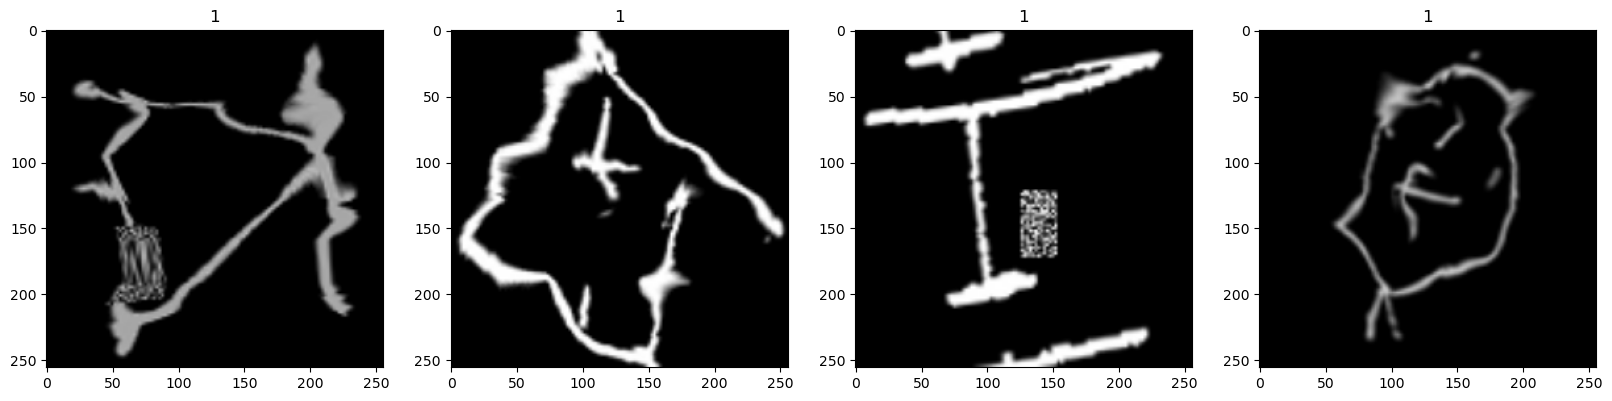

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

7925

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Save the model to a file
model.save('my_model.h5')

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Define the model file name
model_file_name = 'my_model.h5'

# Create the full path to the model file
model_path = os.path.join(current_directory, model_file_name)

# Display the full path
print(f"Full path to the model file: {model_path}")

Full path to the model file: e:\Research\data\my_model.h5


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#  Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])  

Epoch 1/10
2976/7925 [==========>...................] - ETA: 1:24:08 - loss: 2.3790e-04 - accuracy: 0.9999

KeyboardInterrupt: 

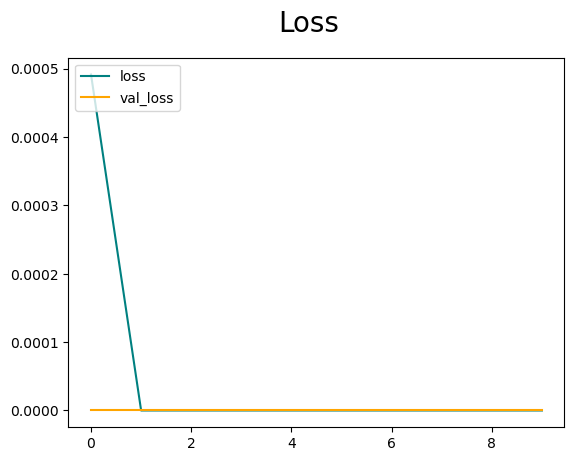

: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

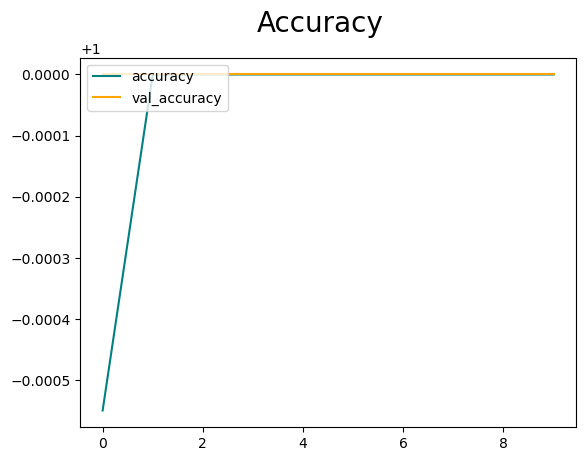

: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

: 

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

: 

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 148ms/step


: 

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


: 

# Test

In [ ]:
import cv2

: 

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\\Research\\data\\test\\4\\15.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

Failed to load the image at path: E:\Research\data\test\4\15.bmp


: 

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\\Research\\data\\test\\4\\15.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Resize the image using TensorFlow
    resize = tf.image.resize(img, (256, 256))
    
    # Convert the resized image to NumPy array and cast it to int for display
    resized_image = resize.numpy().astype(int)
    
    # Display the resized image
    plt.imshow(resized_image)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

Failed to load the image at path: E:\Research\data\test\4\15.bmp


: 

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

: 

In [ ]:
yhat

array([[0.99999136]], dtype=float32)

: 

In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

# Load your trained model (replace with your model path)
model_path = 'e:\\Research\\my_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the path to the folder containing BMP images for prediction
train_data_dir = 'E:\\Research\\data\\train'  # Training dataset directory
test_data_dir = 'E:\\Research\\test'  # Testing dataset directory

# Create a list of folder names from 0 to 14 (assuming class indices start from 0)
folder_names = [str(i) for i in range(0, 15)]

# Function to check if a file has a .bmp extension
def is_bmp_file(filename):
    return filename.lower().endswith('.bmp')

# Function to load and preprocess a BMP image
def preprocess_bmp_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, target_size)  # Resize to match model input size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        return img
    else:
        return None

# Load the training data using tf.keras.utils.image_dataset_from_directory
image_size = (256, 256)
batch_size = 32
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
)

# Randomly select a folder from the available classes
selected_folder = random.choice(train_data.class_names)

# Print the selected folder for debugging
print(f"Selected Folder: {selected_folder}")

# Get the folder path for the selected class
selected_folder_path = os.path.join(train_data_dir, selected_folder)

# Get a list of BMP images in the selected folder
training_images = [f for f in os.listdir(selected_folder_path) if is_bmp_file(f)]

if training_images:
    selected_image_filename = random.choice(training_images)
    selected_image_path = os.path.join(selected_folder_path, selected_image_filename)

    # Print the selected image filename for debugging
    print(f"Selected Image Filename: {selected_image_filename}")

    # Preprocess the selected BMP image
    selected_image = preprocess_bmp_image(selected_image_path, target_size=image_size)

    if selected_image is not None:
        # Make predictions using the selected image
        predictions = model.predict(selected_image)

        # Get the predicted folder number as the index of the highest probability
        predicted_folder_index = np.argmax(predictions)

        # Get the predicted folder name based on class indices
        predicted_folder_name = folder_names[predicted_folder_index]

        # Display the selected image, predicted folder number, and predictions
        cv2.imshow("Selected Image", cv2.imread(selected_image_path))
        print(f'Selected Image: {selected_image_filename}')
        print(f'Predicted folder number is {predicted_folder_name}')
        print(f'Predictions: {predictions}')
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f'Failed to load image {selected_image_filename}')
else:
    print(f'No images found in folder {selected_folder}')


Found 123411 files belonging to 16 classes.
Selected Folder: train7
Selected Image Filename: 15658.bmp
1/1 [==============================] - 0s 193ms/step
Selected Image: 15658.bmp
Predicted folder number is 0
Predictions: [[1.]]


: 

#  Save the Model

In [ ]:
from tensorflow.keras.models import load_model

: 

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


: 

In [ ]:
new_model = load_model('e:\\Research\\my_model.h5')

: 

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 297ms/step


array([[0.99999136]], dtype=float32)

: 